In [1]:
import numpy as np
import pandas as pd

In [2]:
import urllib.request as webreq
import os

local_files =  ["c:/Works/training_two_classes.svm", "c:/Works/test_two_classes.svm"]

urls = ['http://bit.ly/37FTdmY', 'http://bit.ly/2tLzzqV']

for f_name, url in zip(local_files, urls):
    if not os.path.exists (f_name):
        http_msg = webreq.urlretrieve (url, f_name) 

In [3]:
from sklearn.datasets import load_svmlight_file
trainData, trainLabels = load_svmlight_file("training_two_classes.svm")

In [4]:
trainLabels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [5]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(n_estimators=3, random_state=1).fit(trainData, trainLabels)

In [6]:
RFModel

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

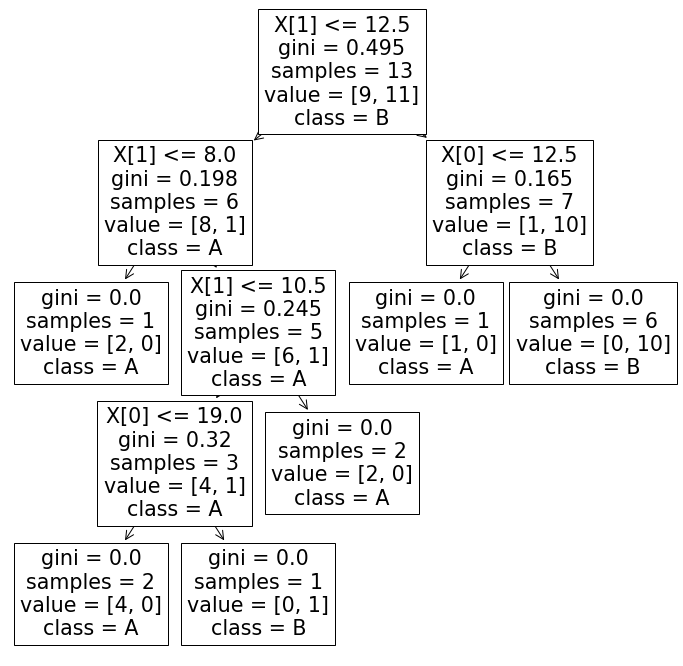

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,12))

tree.plot_tree(RFModel.estimators_[0], class_names= ['A', 'B']);  

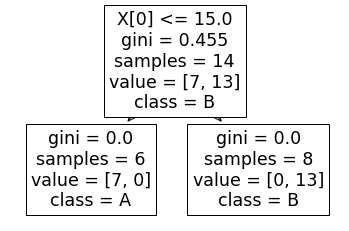

In [10]:
tree.plot_tree(RFModel.estimators_[1], class_names= ['A', 'B']); 

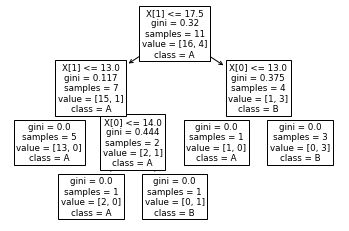

In [11]:
tree.plot_tree(RFModel.estimators_[2], class_names= ['A', 'B']); 

In [12]:
RFModel.predict([[0,0], [10,9], [2,5], [19,18], [15,16]])

array([0., 0., 0., 1., 1.])

In [13]:
testData, testLabels = load_svmlight_file("c:/Works/test_two_classes.svm")

In [14]:
testData.toarray()

array([[ 7.,  9.],
       [ 8.,  7.],
       [ 9.,  8.],
       [21., 14.],
       [15., 23.],
       [18., 24.]])

In [15]:
testLabels

array([0., 0., 0., 1., 1., 1.])

In [16]:
predictedLabels = RFModel.predict(testData)

In [17]:
import sklearn.metrics as metrics
metrics.confusion_matrix(testLabels, predictedLabels)

array([[3, 0],
       [0, 3]], dtype=int64)

In [18]:
testLabels[-1] = 0; testLabels

array([0., 0., 0., 1., 1., 0.])

In [19]:
metrics.confusion_matrix(testLabels, predictedLabels)

array([[3, 1],
       [0, 2]], dtype=int64)